# Import Library

In [54]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Preprocessing Data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Model Classification
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')


# **Import Data**

In [55]:
for dirname, _, filenames in os.walk('/kaggle/input/customer-analytics/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-analytics/Train.csv


In [56]:
file_path = '/kaggle/input/customer-analytics/Train.csv'
df = pd.read_csv(file_path)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


### Dataset Information:

Dataset Description: E-Commerce Shipping Data

Dataset Source:

Dataset source link: https://www.kaggle.com/datasets/prachi13/customer-analytics

Context:

This dataset comes from an international e-commerce company that sells electronic products. The company wants to analyse their customer data to gain useful insights, especially regarding product delivery. They used machine learning techniques to study customer behaviour and improve delivery services.

Dataset Content:

The dataset consists of 10,999 observations (rows) and 12 variables (columns). Here is a description of each variable:

- ID: Unique identification number for each customer.

- Warehouse block: The company's warehouse is divided into blocks, namely A, B, C, D, and E.
- Mode of shipment: Product delivery method, which consists of Ship, Flight, and Road.
- Customer care calls: The number of calls made by customers to enquire about the status of a shipment.
- Customer rating: The rating given by the customer, on a scale of 1 (worst) to 5 (best).
- Cost of the product: The price of the product in US Dollars.
- Prior purchases: The number of purchases the customer has made previously.
- Product importance: The level of importance of the product, categorised as low, medium, or high.
- Gender: The gender of the customer, categorised as male or female.
- Discount offered: The discount offered for a particular product.
- Weight in gms: The weight of the product in grams.
- Reached on time: A target variable that indicates whether the product arrived on time. A value of 1 means the product did not reach on time, while 0 means the product reached on time.

In [57]:
# Cek row dan kolom
print(f'Row: {df.shape[0]}, Column: {df.shape[1]}')

Row: 10999, Column: 12


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [59]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


**Descriptive Statistics Analysis**

1. Customer Care Calls:

- The mean is 4.05, indicating that most customers make multiple calls to customer service.
- The median is 4, indicating that half of the customers made 4 or more calls.

2. Customer Rating:

- Average 2.99, indicating that customer ratings tend to be low.
- The median of 3, indicating that half of the customers gave a rating of 3 or more.
- The standard deviation is 1.41, indicating that there is variation in customer ratings.

3. Cost of the Product:
- The average is 210.20, indicating that the products sold tend to be in the middle to upper price range.
- The standard deviation is 48.06, indicating that there is variation in product prices.
- The minimum value is $96 and the maximum is 310, indicating that there is a wide price range.

4. Prior Purchases:
- The mean is 3.57, indicating that customers are likely to make repeat purchases.
- The median is 3, indicating that half of the customers made 3 or more previous purchases.
- The standard deviation is 1.52, indicating that there is variation in the number of previous purchases.

5. On Time Delivery (Reached.on.Time_Y.N):
- The mean is 0.59, indicating that about 59% of the products arrived on time.
- The median is 1, indicating that half of the products arrived on time (value 1).
- The minimum value is 0 and the maximum is 1, indicating that this variable is a binary variable indicating whether the product arrived on time or not.

# **Exploratory Data Analysis (EDA)**

In [60]:
# Rename Column
df.rename(columns={
    'Warehouse_block': 'warehouse',
    'Mode_of_Shipment': 'shipment',
    'Customer_care_calls': 'calls',
    'Customer_rating': 'rating',
    'Cost_of_the_Product': 'price',
    'Prior_purchases': 'purchases',
    'Product_importance': 'important',
    'Gender': 'gender',
    'Discount_offered': 'discount',
    'Weight_in_gms': 'weight',
    'Reached.on.Time_Y.N': 'reached',
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         10999 non-null  int64 
 1   warehouse  10999 non-null  object
 2   shipment   10999 non-null  object
 3   calls      10999 non-null  int64 
 4   rating     10999 non-null  int64 
 5   price      10999 non-null  int64 
 6   purchases  10999 non-null  int64 
 7   important  10999 non-null  object
 8   gender     10999 non-null  object
 9   discount   10999 non-null  int64 
 10  weight     10999 non-null  int64 
 11  reached    10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [61]:
# Menghapus kolom "ID dan gender karena tidak ada korelasi nya"
df.drop(columns='ID', inplace=True)
df.tail()

,warehouse,shipment,calls,rating,price,purchases,important,gender,discount,weight,reached
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,D,Ship,2,5,155,5,low,F,6,1639,0


In [62]:
# Menyiimpan data untuk tipe data numerical dan kategorical
num_col = df.select_dtypes(include=['int64','float64']).columns
cat_col = df.select_dtypes(include=['object']).columns

<function matplotlib.pyplot.show(close=None, block=None)>

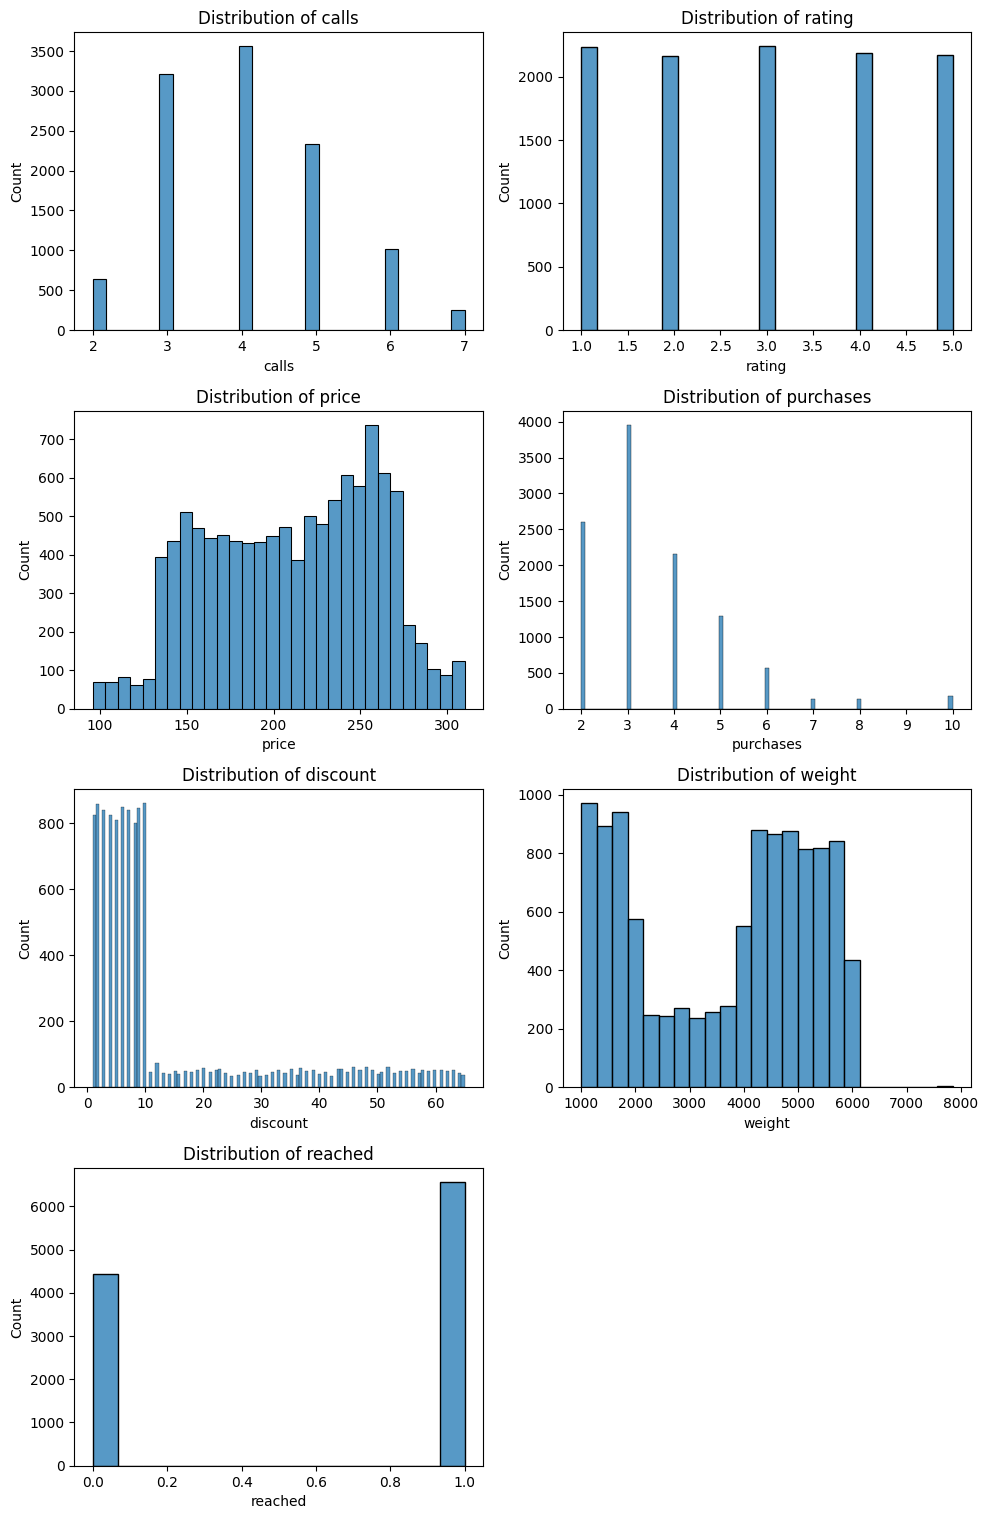

In [63]:
# Ambil data numeric column
fig, axes = plt.subplots(8, 2 , figsize=(10,30))

# mengubah array 2D dari subplot (3 baris x 2 kolom) menjadi array 1D dengan 6 elemen.
axes = axes.flatten()

for i, column in enumerate(num_col):
  sns.histplot(data=df, x=column, ax=axes[i], palette='viridis')
  axes[i].set_title(f'Distribution of {column}', fontsize=12)

for i in range(len(num_col), 8 * 2):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show

Information:
1. Distribution of calls
- The most distribution is in variable 4 and the least data distribution is in variable 7.
- The distribution of data is more in the middle with a range of variables 3, 4, and 5.
2. Distribution of rating
- The distribution of rating data is well distributed and even. With a variable range of 1.0 - 5.0
3. Distribution of price
- The data is well distributed with the largest amount flat in the middle.
- The data range is widely spread in the range 150 - 250
4. Distribution of purchases
- Data distribution is most widely spread in variable 3.0 and lowest in variable 5.0.
5. Distribution of discount
- The data distribution is uneven and more scattered on the left with a variable range of 0 - 10.0
- The lowest data distribution is spread in the range 12.0 - 17.5
6. Distribution of weight
- Data is more on the right side with a range of 4000 - 6000
- There is little data distribution around the 3000 variable
7. Distribution of reached
- The data is well distributed and has a balanced amount between variables 0 and 1.

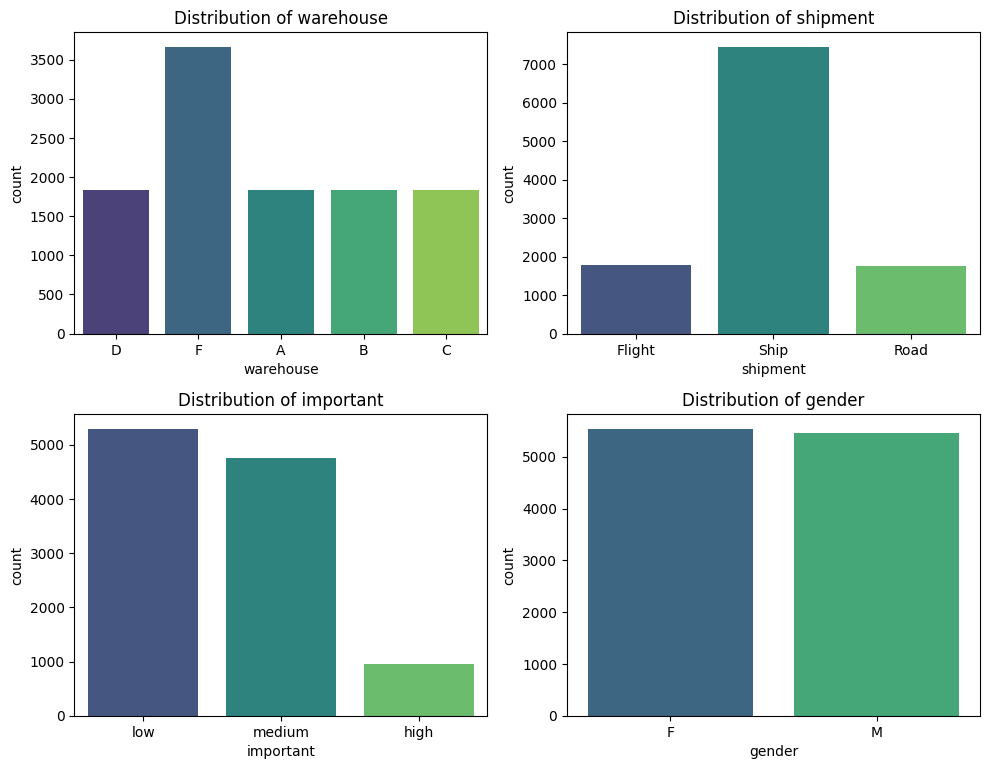

In [64]:
# Distribution of Categorical column
plt.figure(figsize=(10,15))
for i, column in enumerate(cat_col, 1):
  plt.subplot(4, 2, i)
  sns.countplot(x=df[column], palette='viridis')
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Information:
1. Distribution of warehouses
- The data is fairly well distributed, but there is an increase in the amount of data in the variable F
2. Distribution of shipment
- The data is more spread on the ship variable with more than 5000 data values.
- Flight and road variables have a balanced amount of data distribution but few values.
3. Distribution of important
- Data with high variables has a small amount compared to medium and low variables.
- Data is more widely spread on medium and low variables
4. Distribution of gender
- Data is well distributed between female and male variables

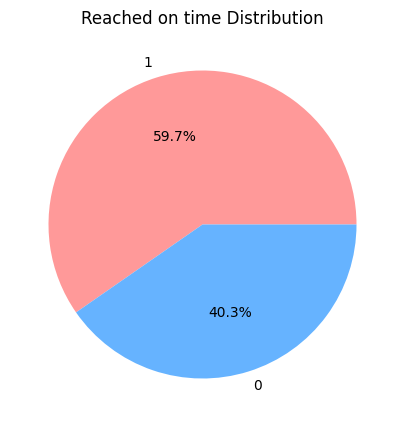

In [65]:
# Pie Chart
ontime_counts = df['reached'].value_counts()
plt.figure(figsize = (10,5))
plt.pie(ontime_counts, labels=ontime_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Reached on time Distribution')
plt.show()

Information about labels:
- The data distribution is quite good, with a larger portion in variable 1 with a percentage of 59.7% where 1 Indicates that the product has NOT reached on time.
- Data distribution on variable 0 with a percentage of 40.3% which 0 indicates it has reached on time.

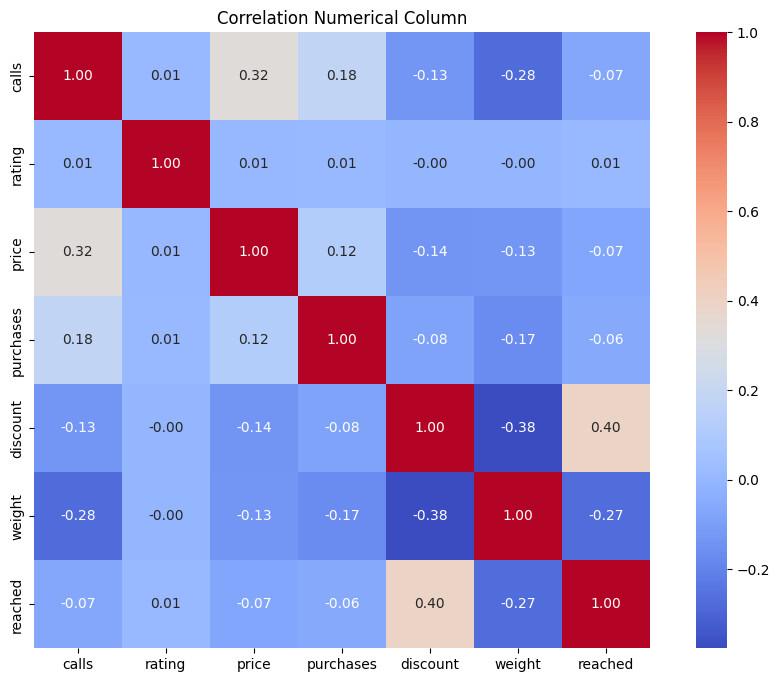

In [66]:
# Analisis Correlation Numerical column
plt.figure(figsize=(12,8))
corr_num = df[num_col].corr()
sns.heatmap(corr_num, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Numerical Column')
plt.show()

Data correlation information:
- The calls variable has a fairly strong correlation with the purchases variable of 0.35 and the price variable of 0.37.
- The price and purchases variables also have a fairly good correlation with a positive correlation value of 0.25
- The low correlation is shown by the purchase and weight variables with a correlation value of -0.46 followed by the calls and weight variables with a value of -0.42.

# Data Preprocessing

In [67]:
# Checking for missing values
df.isnull().sum()

warehouse    0
shipment     0
calls        0
rating       0
price        0
purchases    0
important    0
gender       0
discount     0
weight       0
reached      0
dtype: int64

In [68]:
# Cek  duplicate
cek_duplicate = df.duplicated().any()
print(cek_duplicate)

# True = present, False = not present

False


In [69]:
df[num_col].head()

,calls,rating,price,purchases,discount,weight,reached
0,4,2,177,3,44,1233,1
1,4,5,216,2,59,3088,1
2,2,2,183,4,48,3374,1
3,3,3,176,4,10,1177,1
4,2,2,184,3,46,2484,1


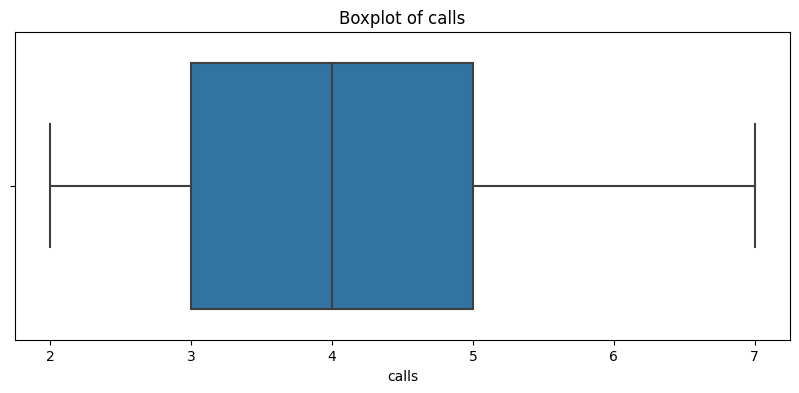

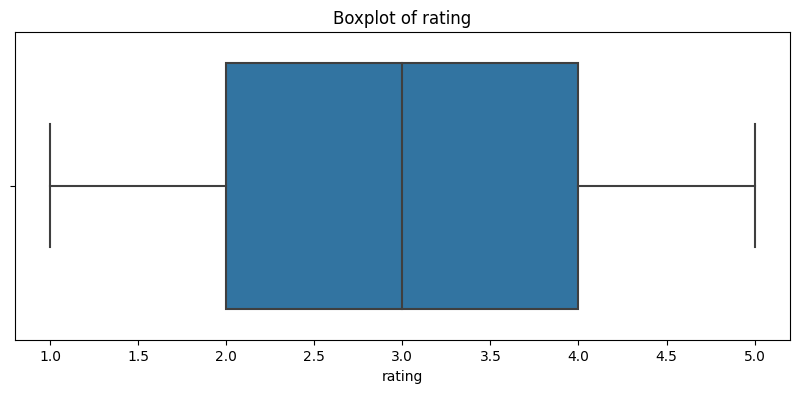

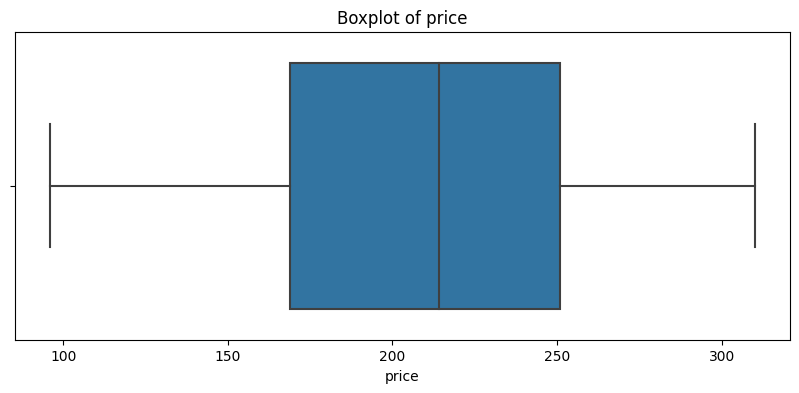

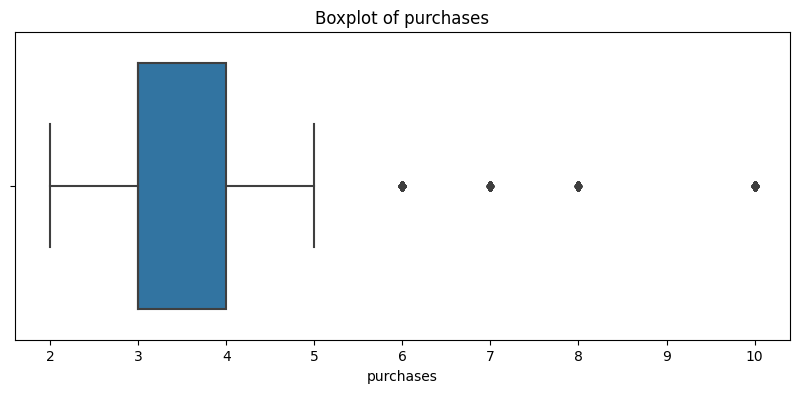

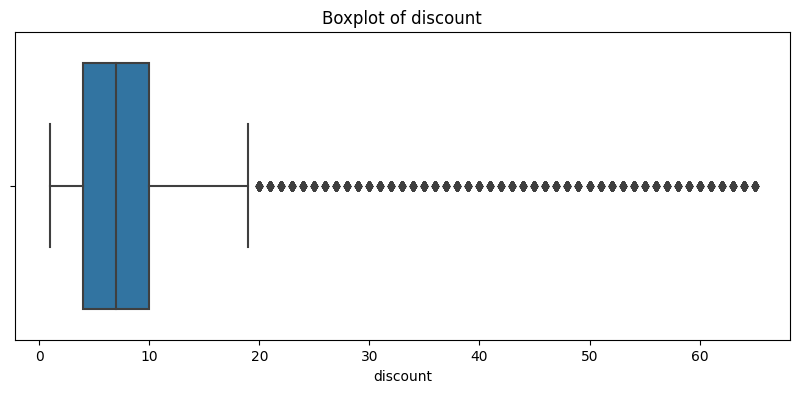

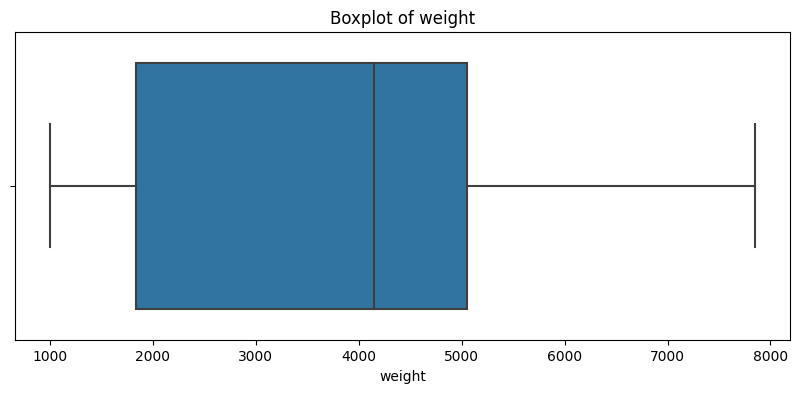

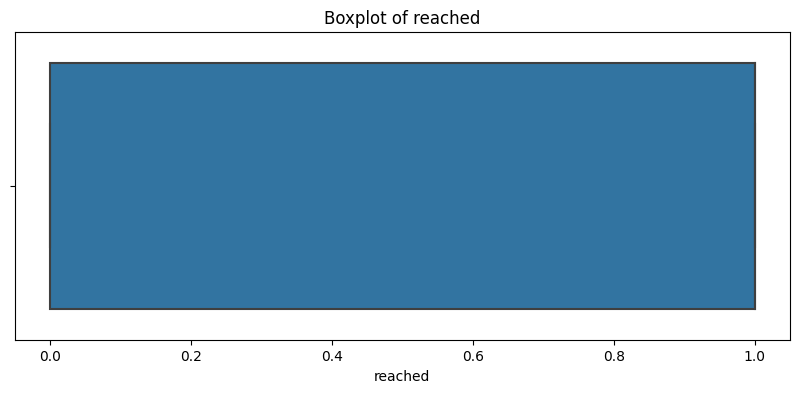

In [70]:
# Check outliers in numerical data

for feature in num_col:
  plt.figure(figsize=(10,4))
  sns.boxplot(x=df[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

In [71]:
# Handling outliers

# Identify outliers
Q1 = df[num_col].quantile(0.25)
Q3 = df[num_col].quantile(0.75)
IQR = Q3 - Q1

# Replacing outliers with lower and upper bound values
condition = ~((df[num_col] < (Q1 - 1.5 * IQR)) | (df[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filter_num = df.loc[condition, num_col]

# Merge data with categorical
df = pd.concat([df_filter_num, df.loc[condition, cat_col]], axis=1)

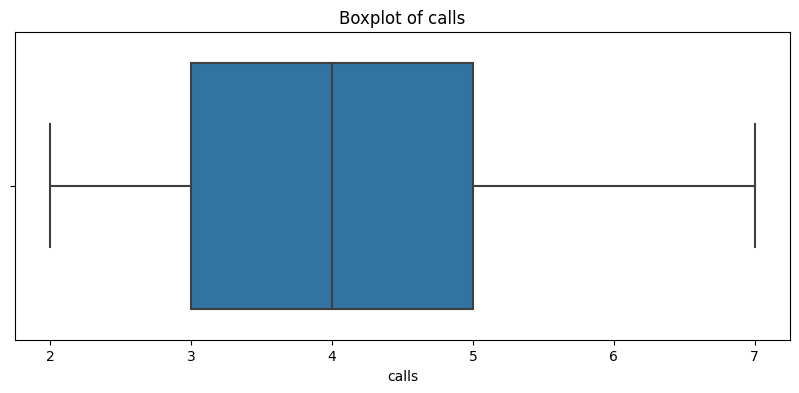

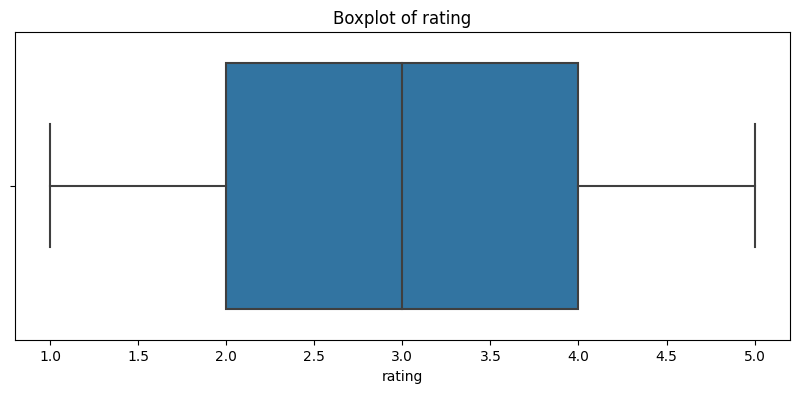

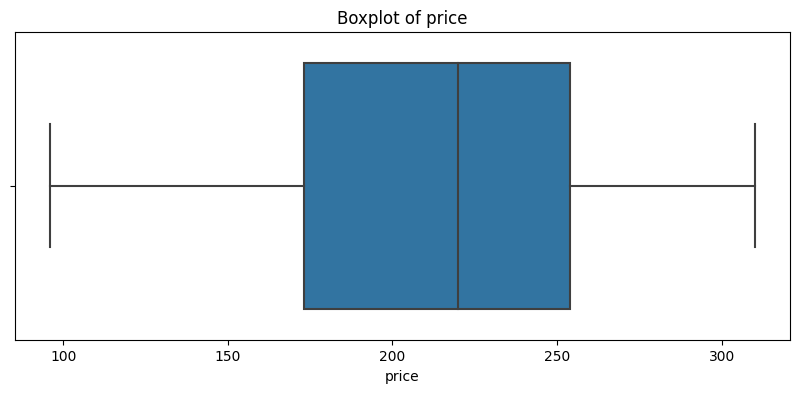

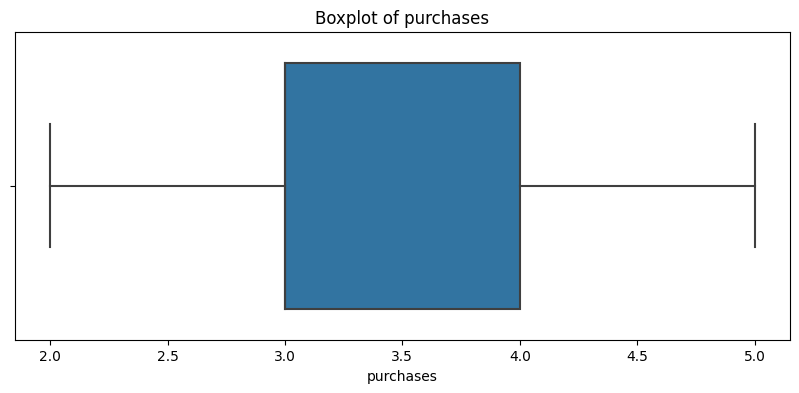

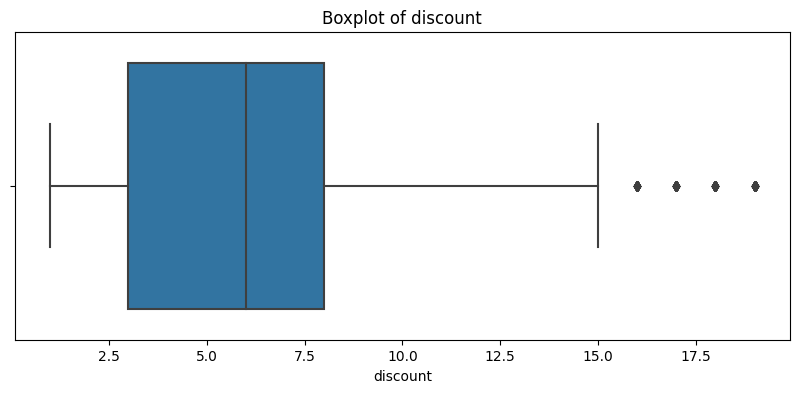

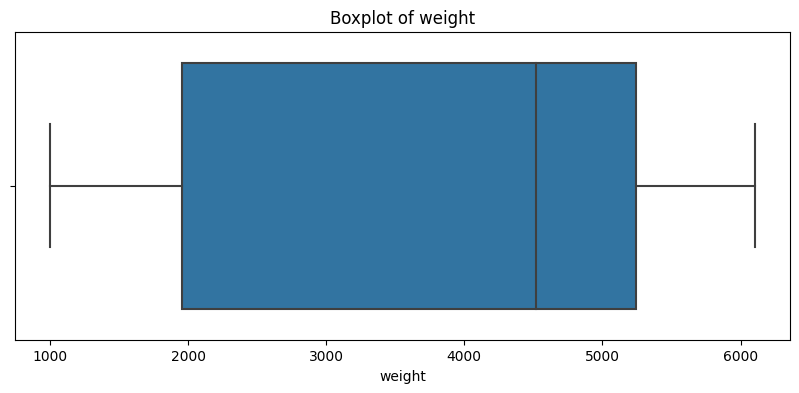

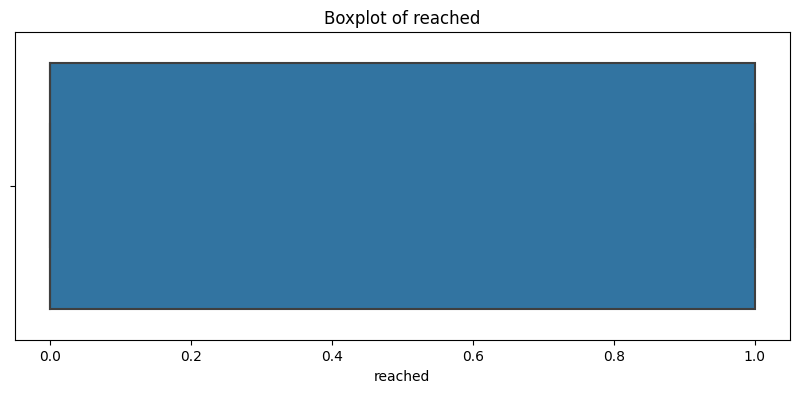

In [72]:
# Check outliers after handling
for feature in num_col:
  plt.figure(figsize=(10,4))
  sns.boxplot(x=df[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

In [73]:
df[cat_col]

,warehouse,shipment,important,gender
3,B,Flight,medium,M
5,F,Flight,medium,F
6,D,Flight,low,F
8,A,Flight,low,F
10,C,Flight,medium,M
...,...,...,...,...
10992,D,Ship,medium,M
10994,A,Ship,medium,F
10995,B,Ship,medium,F
10996,C,Ship,low,F


In [74]:
# Binning data to change categorical data types
oh_col = ['warehouse', 'shipment', 'gender']

# 1. One-hot Encoding
df_onehot = pd.get_dummies(df[oh_col], drop_first=True).astype(int)

# 2. Lable encode
label_encoder = LabelEncoder()
df['important'] = label_encoder.fit_transform(df['important'])

# Merge the result of encode
df[df_onehot.columns] = df_onehot

df.drop(columns=oh_col, inplace=True)
df.head()

,calls,rating,price,purchases,discount,weight,reached,important,warehouse_B,warehouse_C,warehouse_D,warehouse_F,shipment_Road,shipment_Ship,gender_M
3,3,3,176,4,10,1177,1,2,1,0,0,0,0,0,1
5,3,1,162,3,12,1417,1,2,0,0,0,1,0,0,0
6,3,4,250,3,3,2371,1,1,0,0,1,0,0,0,0
8,3,4,150,3,11,1861,1,1,0,0,0,0,0,0,0
10,3,4,189,2,12,2888,1,2,0,1,0,0,0,0,1


<Axes: >

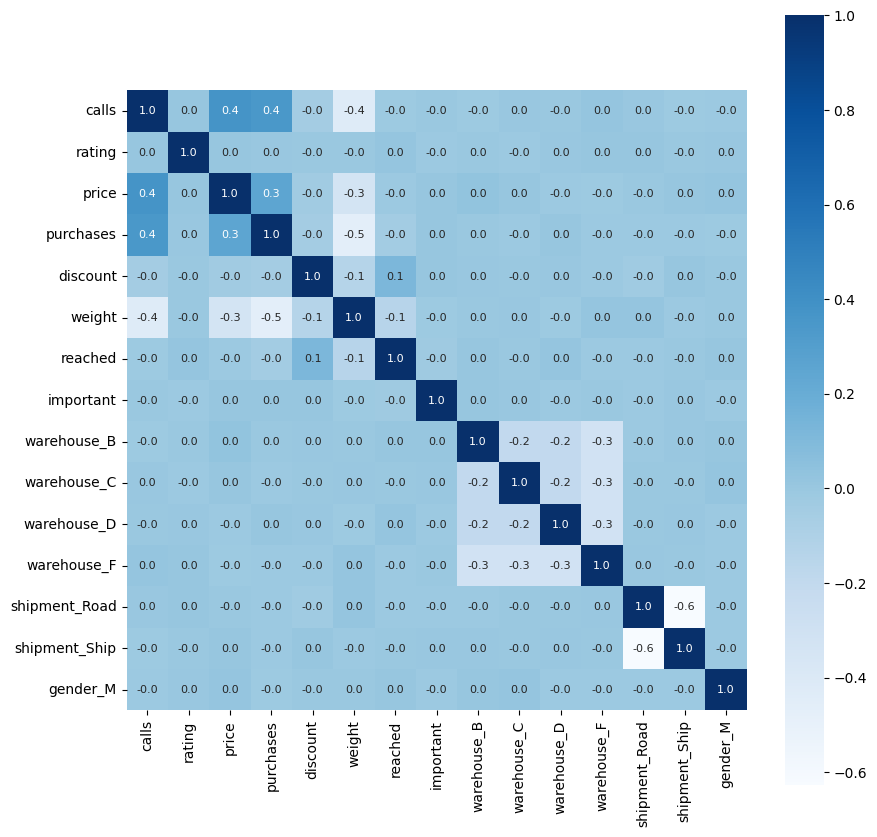

In [75]:
# create a new variable to put the function
corr = df.corr()

# create a visualisation of the Shipping dataset correlation
plt.figure(figsize=(10,10))

# Create Heatmap Visualisations to see feature correlations
sns.heatmap(
    corr, cbar=True, square=True, 
    fmt='.1f', annot=True, 
    annot_kws={'size':8}, 
    cmap='Blues'
)

# **Building a Classification Model**

In [76]:
# Separating features with labels
X = df.drop(columns='reached') # Fitur
y = df['reached'].values # Label

# Standarisasi Fitur Numeric
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

# Spilt data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=42)

print(f'Data Train: {X_train.shape}')
print(f'Data Test: {X_test.shape}')

Data Train: (6376, 14)
Data Test: (1595, 14)


In [77]:
# inisialisasi model Classification
models = [
  ('dt_classifier', DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)),
  ('nb_classifier', GaussianNB()),
  ('knn_classifier', KNeighborsClassifier(n_neighbors=7)),
  ('rf_classifier', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, criterion='entropy', random_state=42)),
  ('svm_classifier', SVC(kernel='rbf', C=10, random_state=42, gamma=0.1))
]

# Variabel menyimpan hasil model
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': []
}

for model_name, model in models:
  # Train the model
  model.fit(X_train, y_train)

  # Prediksi dengan data uji
  y_pred = model.predict(X_test)

  # Menyimpan hasil evaluasi
  results['Model'].append(model_name)
  results['Accuracy'].append(accuracy_score(y_test, y_pred) * 100)
  results['Precision'].append(precision_score(y_test, y_pred) * 100)
  results['Recall'].append(recall_score(y_test, y_pred) * 100)
  results['F1'].append(f1_score(y_test, y_pred) * 100)

# Menampilkan hasil
results_df =  pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1
0,dt_classifier,60.250784,69.761905,36.625,48.032787
1,nb_classifier,56.112853,58.445946,43.250,49.712644
2,knn_classifier,54.420063,55.282200,47.750,51.240778
3,rf_classifier,60.626959,73.118280,34.000,46.416382
4,svm_classifier,55.673981,57.254290,45.875,50.936849


## Hyperparameter Tuning

In [78]:
# Grid search parameters untuk setiap model
param_grids = {
    'dt_classifier': {
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 10, 20]
    },
    'nb_classifier': {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    },
    'knn_classifier': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'rf_classifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 10, 20],
        'criterion': ['gini', 'entropy']
    },
    'svm_classifier': {
        'C': [0.1, 1, 10],
        'gamma': [0.01, 0.1, 1],
        'kernel': ['rbf', 'linear']
    }
}


In [79]:
# Variable to store evaluation results
results = {
    'Model': [],
    'Best Parameters': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': []
}

for model_name, model in models:
    print(f'Memulai GridSearchCV untuk model: {model_name}')
    
    # GridSearchCV to find the best parameters
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], 
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    
    # Training model with GridSearchCV
    grid_search.fit(X_train, y_train)

    # Prediction with data train use the best model in GridSearchCV
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    # Menyimpan hasil evaluasi
    results['Model'].append(model_name)
    results['Best Parameters'].append(grid_search.best_params_)
    results['Accuracy'].append(accuracy_score(y_test, y_pred) * 100)
    results['Precision'].append(precision_score(y_test, y_pred) * 100)
    results['Recall'].append(recall_score(y_test, y_pred) * 100)
    results['F1'].append(f1_score(y_test, y_pred) * 100)

# display results
results_tuning_df = pd.DataFrame(results)
results_tuning_df

Memulai GridSearchCV untuk model: dt_classifier
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Memulai GridSearchCV untuk model: nb_classifier
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Memulai GridSearchCV untuk model: knn_classifier
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Memulai GridSearchCV untuk model: rf_classifier
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Memulai GridSearchCV untuk model: svm_classifier
Fitting 5 folds for each of 18 candidates, totalling 90 fits


,Model,Best Parameters,Accuracy,Precision,Recall,F1
0,dt_classifier,"{'max_depth': 5, 'min_samples_split': 2}",60.877743,85.772358,26.375,40.344168
1,nb_classifier,{'var_smoothing': 1e-09},56.112853,58.445946,43.250,49.712644
2,knn_classifier,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",55.673981,56.431535,51.000,53.578464
3,rf_classifier,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",60.250784,80.072464,27.625,41.078067
4,svm_classifier,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",58.432602,75.091575,25.625,38.210624


Fitting 5 folds for each of 12 candidates, totalling 60 fits


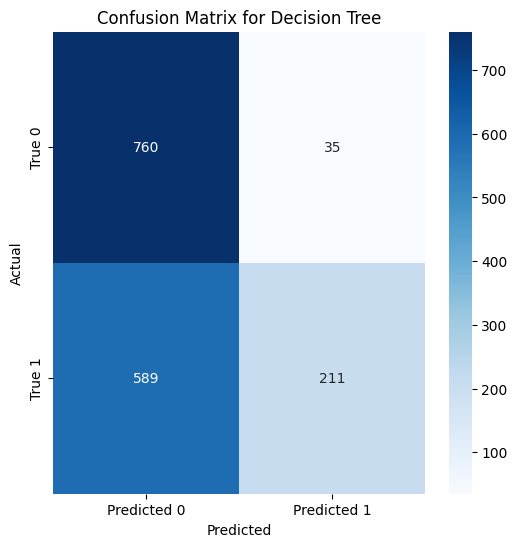

In [80]:
# Getting Started with Decision Tree
model_name = 'dt_classifier'

# Take the best model from GridSearchCV
grid_search = GridSearchCV(estimator=models[0][1], param_grid=param_grids[model_name], 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Prediction with the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Count confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualization confusion matrix for Decision Tree
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


0 = reached on time, 1 = product has NOT reached on time

Information:
- True Positives (TP): 760 deliveries arrived on time and were predicted to be correct. 
- False Positives (FP): 35 Shipments that were actually on time were predicted as not on time.
- True Negatives (TN): 211 shipments that did not arrive on time were predicted as untimely.
- False Negatives (FN): 589 Shipments that actually arrived on time were predicted as not arriving on time

Translated with DeepL.com (free version)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


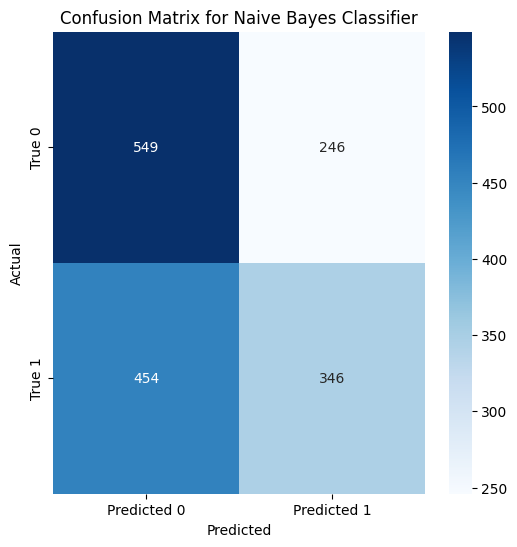

In [81]:
# Getting Started with Naive Bayes Classifier
model_name = 'nb_classifier'

# Retrieve the best model from GridSearchCV
grid_search = GridSearchCV(estimator=models[1][1], param_grid=param_grids[model_name], 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Predictions with the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisation of confusion matrix for Naive Bayes Classifier
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


0 = reached on time, 1 = product has NOT reached on time

Information:
- True Positives (TP): 549 deliveries arrived on time and predicted correct results. 
- False Positives (FP): 246 deliveries that were actually on time were predicted as not on time.
- True Negatives (TN): 346 shipments that did not arrive on time were predicted as untimely shipments
- False Negatives (FN): 454 Shipments that actually arrived on time were predicted as not arriving on time

Fitting 5 folds for each of 16 candidates, totalling 80 fits


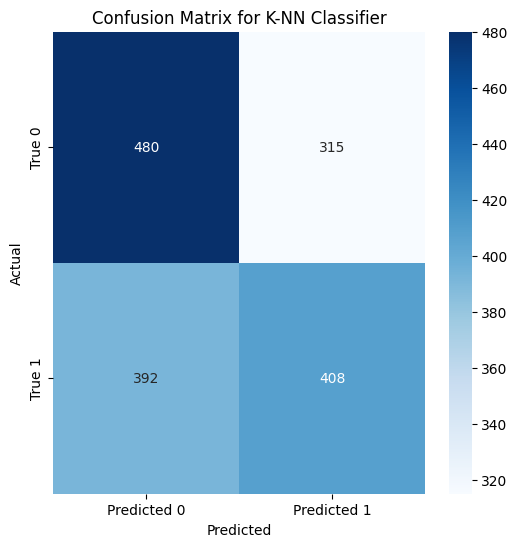

In [82]:
# Getting Started with K-NN Classifier
model_name = 'knn_classifier'

# Retrieve the best model from GridSearchCV
grid_search = GridSearchCV(estimator=models[2][1], param_grid=param_grids[model_name], 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Predictions with the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisation of confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix for K-NN Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


0 = reached on time, 1 = product has NOT reached on time

Information:
- True Positives (TP): 480 deliveries arrived on time and predicted correct results. 
- False Positives (FP): 315 Shipments that were actually on time were predicted as not on time.
- True Negatives (TN): 408 shipments that did not arrive on time were predicted as untimely.
- False Negatives (FN): 392 Shipments that actually arrived on time were predicted as not arriving on time

Fitting 5 folds for each of 72 candidates, totalling 360 fits


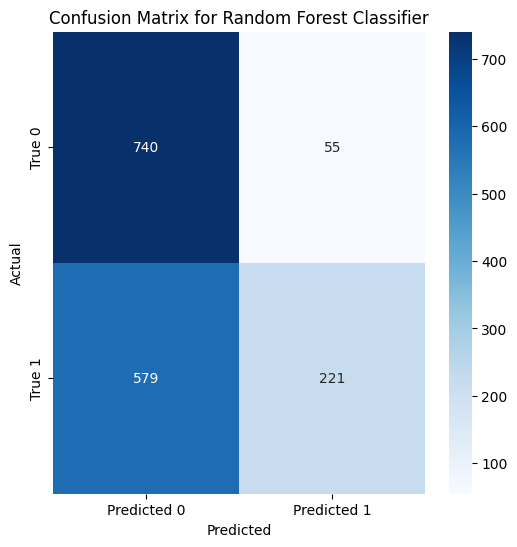

In [83]:
# Getting Started with Random Forest Classifier
model_name = 'rf_classifier'

# Retrieve the best model from GridSearchCV
grid_search = GridSearchCV(estimator=models[3][1], param_grid=param_grids[model_name], 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Predictions with the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisation of confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


0 = reached on time, 1 = product has NOT reached on time

Information:
- True Positives (TP): 740 deliveries arrived on time and were predicted to be correct. 
- False Positives (FP): 55 deliveries that were actually on time were predicted as not on time.
- True Negatives (TN): 221 shipments that did not arrive on time were correctly predicted as untimely.
- False Negatives (FN): 579 Shipments that actually arrived on time were predicted as not arriving on time

Fitting 5 folds for each of 18 candidates, totalling 90 fits


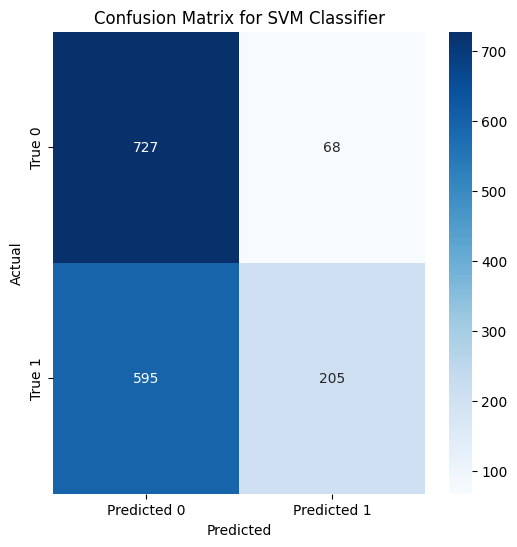

In [84]:
# Getting Started with SVM Classifier
model_name = 'svm_classifier'

# Retrieve the best model from GridSearchCV
grid_search = GridSearchCV(estimator=models[4][1], param_grid=param_grids[model_name], 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Predictions with the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisation of confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix for SVM Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


0 = reached on time, 1 = product has NOT reached on time

Information:
- True Positives (TP): 727 deliveries arrived on time and predicted correct results. 
- False Positives (FP): 68 Shipments that were actually on time were predicted as not on time.
- True Negatives (TN): 205 shipments that did not arrive on time were correctly predicted as untimely.
- False Negatives (FN): 595 Shipments that actually arrived on time were predicted as not arriving on time

Fitting 5 folds for each of 12 candidates, totalling 60 fits


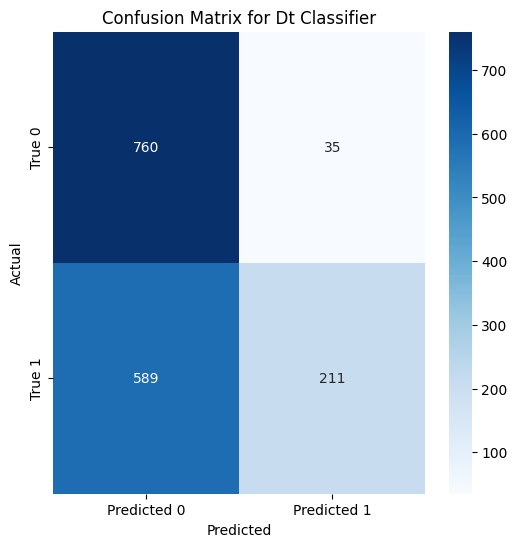

Fitting 5 folds for each of 3 candidates, totalling 15 fits


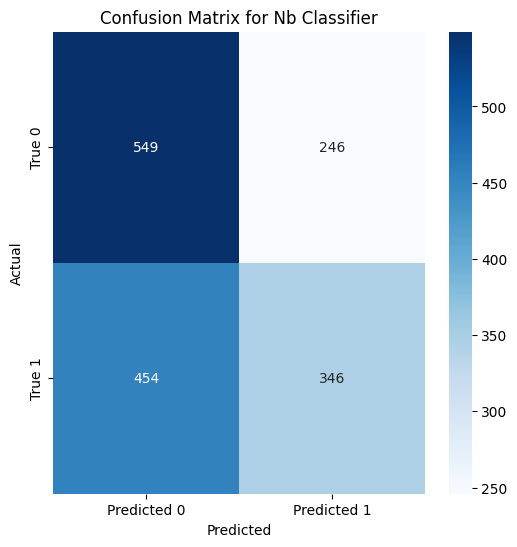

Fitting 5 folds for each of 16 candidates, totalling 80 fits


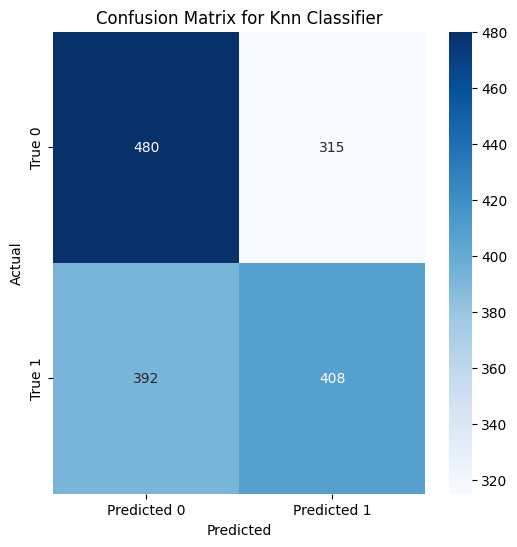

Fitting 5 folds for each of 72 candidates, totalling 360 fits


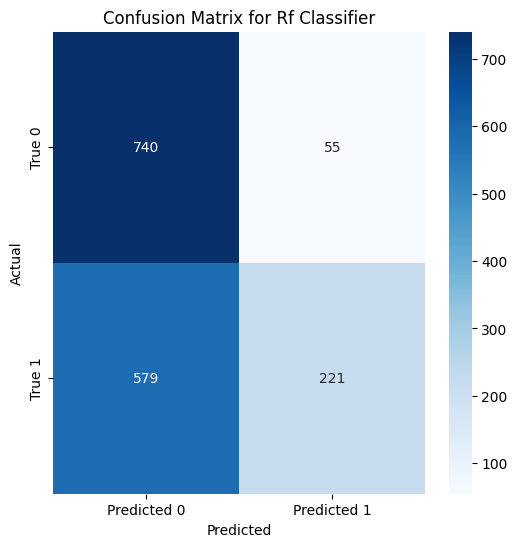

Fitting 5 folds for each of 18 candidates, totalling 90 fits


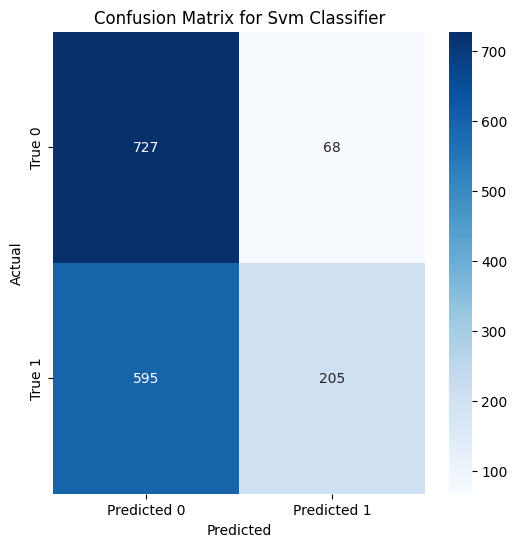

In [85]:
# Display Confusion Metrix for 5 classification algorithms
# List of model names and corresponding indices in the models and param_grids
model_names = ['dt_classifier', 'nb_classifier', 'knn_classifier', 'rf_classifier', 'svm_classifier']

# Loop through all models
for model_name in model_names:
    # Retrieve the best model from GridSearchCV for each model
    grid_search = GridSearchCV(estimator=models[model_names.index(model_name)][1], param_grid=param_grids[model_name], 
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # Predictions with the best model
    y_pred = grid_search.best_estimator_.predict(X_test)

    # Calculating confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualisation of confusion matrix for each model
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion Matrix for {model_name.replace("_", " ").title()}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Analysis of Classification Model Evaluation Results

In [ ]:
# Trial 1 without Hyperparameter Tuning
results_df.head()

,Model,Accuracy,Precision,Recall,F1
0,dt_classifier,60.250784,69.761905,36.625,48.032787
1,nb_classifier,56.112853,58.445946,43.250,49.712644
2,knn_classifier,54.420063,55.282200,47.750,51.240778
3,rf_classifier,60.626959,73.118280,34.000,46.416382
4,svm_classifier,55.673981,57.254290,45.875,50.936849


In [ ]:
# Experiment 2 Hyperparameter Tuning results
results_tuning_df.head()

,Model,Best Parameters,Accuracy,Precision,Recall,F1
0,dt_classifier,"{'max_depth': 5, 'min_samples_split': 2}",60.877743,85.772358,26.375,40.344168
1,nb_classifier,{'var_smoothing': 1e-09},56.112853,58.445946,43.250,49.712644
2,knn_classifier,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",55.673981,56.431535,51.000,53.578464
3,rf_classifier,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",60.250784,80.072464,27.625,41.078067
4,svm_classifier,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",58.432602,75.091575,25.625,38.210624


1. **Comparison of evaluation results before and after**
    - Decision Tree: Accuracy increased from 60.25% to 60.87%, Precision increased significantly from 69.76% to 85.77%, but recall dropped from 36.63% to 26.38%. F1-score also dropped from 48.03 to 40.34, indicating that the model became more specific but less sensitive to positive predictions.
    - Naïve Bayes: Results did not change after tuning (as only one main parameter was optimised).
    - K-Nearest Neighbours: Accuracy increased from 54.42% to 55.67%, Precision increased slightly from 55.28% to 56.43%. Recall increased from 47.75% to 51.00% and F1-score increased from 51.24 to 53.58, indicating that the tuning was quite helpful in the balance between precision and recall.
    - Random Forest: Accuracy decreased from 60.63% to 60.25% after tuning.
Precision increased from 73.11% to 80.07%, but recall dropped from 34.00% to 27.63%, meaning the model became more conservative in positive predictions. The F1-score remains low (around 41.08), indicating a trade-off between precision and recall.
    - Support Vector Machine: Accuracy increased from 55.67% to 58.43% after tuning. Precision increased significantly from 57.25% to 75.09%, but recall dropped from 45.88% to 25.63%. F1-score dropped from 50.94 to 38.21, indicating that the model is more likely to avoid false positives but less sensitive to correct detections.
      
2. **Identify model weaknesses**

   - Decision Tree tends to suffer from overfitting on small datasets. Although precision increases after tuning, recall drops dramatically, indicating that the model is less able to capture all positive instances.
   - Naïve Bayes has stable performance but lacks flexibility due to the assumption of independence between features, so the results do not change after tuning.
   - KNN has low performance because it is highly dependent on the selection of the number of neighbours (n_neighbors) and the distance metric. This model is usually less efficient for large datasets due to high computational cost.
   - Random Forest performed well before tuning, but tuning led to a decrease in recall, indicating that the model prefers more conservative decisions.
   - SVM experienced an increase in precision but lost the ability to capture positive instances (recall dropped), indicating that tuning was too restrictive for the model.
     
3. **Recommendations:**

   - Random Forest with more tuning: Using higher n_estimators to improve stability. Adjusting max_depth and min_samples_split to reduce overfitting.
   - Gradient Boosting (XGBoost, LightGBM, or CatBoost): This algorithm is often superior to Decision Tree and Random Forest in classification problems. It can handle more complex data and has regularization techniques to prevent overfitting.
4. **Conclusion:**

   - Hyperparameter tuning helps increase precision but decreases recall in some models.
   - Random Forest and Decision Tree are still the best models in this experiment, but further tuning is needed.
   - It is recommended to try Gradient Boosting for more optimised results.